In [1]:
# 1(a). 다중 손잡이 밴딧 문제를 위한 랜덤 정책
import numpy as np 
arms_profit=[0.4,0.12,0.52,0.6,0.25]
n_arms=len(arms_profit)

n_trial=10000

def pull_bandit(handle):
    return 1 if np.random.random()<arms_profit[handle] else -1

def random_exploration():
    episode=[]
    num=np.zeros(n_arms)
    wins=np.zeros(n_arms)
    for i in range(n_trial):
        h=np.random.randint(0,n_arms)
        reward=pull_bandit(h)
        episode.append([h,reward])
        num[h]+=1
        wins[h]+=1 if reward==1 else 0
    return episode,(num,wins)
e,r=random_exploration()

print('손잡이별 승리 확률:',['%6.4f'%(r[1][i]/r[0][i]) if r[0][i]>0 else 0.0 for i in range(n_arms)])
print('손잡이별 수익($):',['%d'%(2*r[1][i]-r[0][i]) for i in range(n_arms)])
print('순 수익($):',sum(np.asarray(e)[:,1]))

손잡이별 승리 확률: ['0.3889', '0.1064', '0.5244', '0.5863', '0.2596']
손잡이별 수익($): ['-454', '-1539', '100', '341', '-952']
순 수익($): -2504


In [2]:
# 1(b). 다중 손잡이 밴딧 문제를 위한 e(epsilon)-탐욕 알고리즘
import numpy as np 
arms_profit=[0.4,0.12,0.52,0.6,0.25]
n_arms=len(arms_profit)

n_trial=10000

def pull_bandit(handle):
    return 1 if np.random.random()<arms_profit[handle] else -1

def epsilon_greedy(eps):
    episode=[]
    num=np.zeros(n_arms)
    wins=np.zeros(n_arms)
    for i in range(n_trial):
        r=np.random.random()
        if(r<eps or sum(wins)==0):
            h=np.random.randint(0,n_arms)
        else:
            prob=np.asarray([wins[i]/num[i] if num[i]>0 else 0.0 for i in range(n_arms)])
            prob=prob/sum(prob)
            h=np.random.choice(range(n_arms),p=prob)
        reward=pull_bandit(h)
        episode.append([h,reward])
        num[h]+=1
        wins[h]+=1 if reward==1 else 0
    return episode,(num,wins)
        
e,r=epsilon_greedy(0.1)

print('손잡이별 승리 확률:',['%6.4f'%(r[1][i]/r[0][i]) if r[0][i]>0 else 0.0 for i in range(n_arms)])
print('손잡이별 수익($):',['%d'%(2*r[1][i]-r[0][i]) for i in range(n_arms)])
print('순 수익($):',sum(np.asarray(e)[:,1]))

손잡이별 승리 확률: ['0.3955', '0.1137', '0.4944', '0.5950', '0.2581']
손잡이별 수익($): ['-425', '-523', '-30', '616', '-660']
순 수익($): -1022


In [3]:
# 2. gym 라이브러리의 FrozenLake 문제 
import gym 


env=gym.make('FrozenLake-v1',is_slippery=False,render_mode='ansi')
print(env.observation_space)
print(env.action_space)

n_trial=1000

env.reset()
episode=[]
for i in range(n_trial):
    action=env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    episode.append([action,reward,obs])
    print(env.render())
    if terminated or truncated:
        break
    
print(episode)
env.close()

Discrete(16)
Discrete(4)
  (Down)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

[[1, 0.0, 4], [1, 0.0, 8], [1, 0.0, 12]]


c:\Users\kimku\workspace\python_deeplearning\.venv\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [4]:
# 3. Q 러닝 알고리즘을 이용한 FrozenLake 문제해결
import gym 
import numpy as np 

env = gym.make('FrozenLake-v1',is_slippery=False,render_mode='ansi')
Q = np.zeros([env.observation_space.n,env.action_space.n])

rho = 0.8
lamda = 0.99

n_episode = 2000
length_episode = 100

for i in range(n_episode):
    s=env.reset()[0]

    for j in range(length_episode):
        argmaxs = np.argwhere(Q[s,:]==np.amax(Q[s,:])).flatten().tolist()
        a = np.random.choice(argmaxs)
        s1,r,done,_,__ = env.step(a)
        Q[s,a] = Q[s,a]+rho*(r+lamda*np.max(Q[s1,:])-Q[s,a])
        s=s1
        if done: break
np.set_printoptions(precision=2)
print(Q)


[[0.   0.   0.95 0.  ]
 [0.   0.   0.96 0.  ]
 [0.   0.97 0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.98 0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.99 0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   0.   0.  ]]


In [5]:
# 4.Q 러닝 알고리즘을 이용한 FrozenLake 문제해결(ε-탐욕 적용)
import gym 
import numpy as np 
env=gym.make('FrozenLake-v1',is_slippery=False,render_mode='ansi')
Q=np.zeros([env.observation_space.n,env.action_space.n])

rho=0.9
lamda=0.99
eps=1.0
eps_decay=0.999

n_episode=3000
length_episode=100

for i in range(n_episode):
    s=env.reset()[0]
    for j in range(length_episode):
        r=np.random.random()
        eps=max(0.01,eps*eps_decay)
        if(r<eps):a=np.random.randint(0,env.action_space.n)
        else: a=np.random.choice(np.argwhere(Q[s,:]==np.amax(Q[s,:])).flatten().tolist())
        s1,r,done,_,_=env.step(a)
        Q[s,a]=Q[s,a]+rho*(r+lamda*np.max(Q[s1,:])-Q[s,a])
        s=s1
        if done: break

np.set_printoptions(precision=2)
print(Q)

[[0.94 0.95 0.93 0.94]
 [0.   0.   0.94 0.  ]
 [0.52 0.95 0.   0.59]
 [0.   0.   0.   0.  ]
 [0.95 0.96 0.   0.94]
 [0.   0.   0.   0.  ]
 [0.   0.96 0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.96 0.   0.97 0.95]
 [0.96 0.98 0.96 0.  ]
 [0.97 0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.98 0.99 0.97]
 [0.98 0.99 1.   0.96]
 [0.   0.   0.   0.  ]]


In [6]:
# gym render (번외)
from IPython.display import clear_output
import matplotlib.pyplot as plt
import time
import gym 
import numpy as np
env = gym.make('FrozenLake-v1',is_slippery=False,render_mode='human')
# env = gym.make('FrozenLake-v1',is_slippery=False,render_mode='rgb_array')
# env = gym.make('FrozenLake-v1',is_slippery=False,render_mode='ansi')
obs = env.reset()
observation = obs[0]
done = False 
step = 0

def env_render(env):
    clear_output(wait=True)
    if env.render_mode == 'ansi': 
        print("%s | Step: %d %s"%(env.spec.id,step,info))
        print(env.render())
        time.sleep(0.5)
    elif env.render_mode == 'rgb_array':
        plt.figure(3)
        plt.clf()
        plt.title("%s | Step: %d %s"%(env.spec.id,step,info))
        plt.axis('off')
        plt.imshow(env.render())
        plt.show()
        time.sleep(0.5)
    else: env.render()

while not done: 
    step+=1
    action = Q[observation].argmax()
    observation,_,done,_,info = env.step(Q[observation].argmax())    
    env_render(env)
env.close() 

c:\Users\kimku\workspace\python_deeplearning\.venv\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


c:\Users\kimku\workspace\python_deeplearning\.venv\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


0 번째 에피소드의 점수: 33.0 episode time:  1.0799803733825684
1 번째 에피소드의 점수: 29.0 episode time:  0.1581437587738037
2 번째 에피소드의 점수: 9.0 episode time:  0.08107352256774902
3 번째 에피소드의 점수: 20.0 episode time:  0.23421287536621094
4 번째 에피소드의 점수: 16.0 episode time:  0.03903532028198242
5 번째 에피소드의 점수: 14.0 episode time:  0.07807111740112305
6 번째 에피소드의 점수: 16.0 episode time:  0.15413951873779297
7 번째 에피소드의 점수: 22.0 episode time:  0.11710643768310547
8 번째 에피소드의 점수: 41.0 episode time:  2.518287420272827
9 번째 에피소드의 점수: 17.0 episode time:  2.162670850753784
10 번째 에피소드의 점수: 11.0 episode time:  1.4756629467010498
11 번째 에피소드의 점수: 9.0 episode time:  1.422722578048706		last 10 value mean: 17.5
12 번째 에피소드의 점수: 10.0 episode time:  1.3807590007781982		last 10 value mean: 17.6
13 번째 에피소드의 점수: 14.0 episode time:  1.8199710845947266		last 10 value mean: 17.0
14 번째 에피소드의 점수: 17.0 episode time:  2.4642364978790283		last 10 value mean: 17.1
15 번째 에피소드의 점수: 10.0 episode time:  1.4623277187347412		last 10 value mean: 16.7

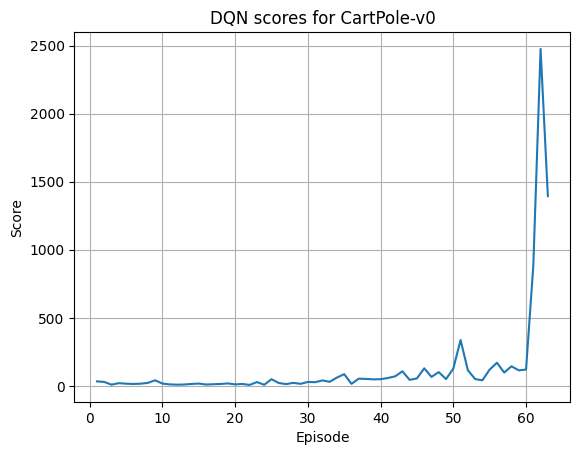

In [7]:
#5. DQN을 이용한 CartPole 문제해결(epsilon-탐욕 적용)
import numpy as np 
import time
import random
import gym 
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam
from collections import deque
import matplotlib.pyplot as plt 
from IPython.display import clear_output

rho=0.9
lamda=0.99
eps=0.9
eps_decay=0.999
batch_siz=64
n_episode=1000

def deep_network():
    model=Sequential()
    model.add(Dense(32,input_dim=env.observation_space.shape[0],activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(env.action_space.n,activation='linear'))
    model.compile(loss='mse',optimizer='Adam')
    return model 

def model_learning():
    mini_batch=np.asarray(random.sample(D,batch_siz),dtype=object)
    state=np.asarray([mini_batch[i,0] for i in range(batch_siz)])
    action=mini_batch[:,1]
    reward=mini_batch[:,2]
    state1=np.asarray([mini_batch[i,3] for i in range(batch_siz)])
    done=mini_batch[:,4]
    
    target=model.predict(state,verbose=0)
    target1=model.predict(state1,verbose=0)
    
    for i in range(batch_siz):
        if done[i]: target[i][action[i]]=reward[i]
        else:target[i][action[i]]+=rho*((reward[i]+lamda*np.amax(target1[i]))-target[i][action[i]])
    model.fit(state,target,batch_size=batch_siz,epochs=1,verbose=0)
    
env=gym.make("CartPole-v1",render_mode='rgb_array')

model=deep_network()
D=deque(maxlen=2000)
scores=[]
max_steps=env.spec.max_episode_steps

for i in range(n_episode):
    s=env.reset()[0]
    long_reward=0
    episode_time = time.time()
    while True:
        r=np.random.random()
        eps=max(0.01,eps*eps_decay)
        if(r<eps): a=np.random.randint(0,env.action_space.n)
        else:
            q=model.predict(np.reshape(s,(1,4)),verbose=0)
            a=np.argmax(q[0])
        s1,r,done,_,_=env.step(a)
        if done and long_reward<max_steps-1: r=-100
        
        D.append((s,a,r,s1,done))
        if len(D)>batch_siz*3: model_learning()
        s=s1
        long_reward+=r
        if done or long_reward>(4.75*max_steps): 
            long_reward=long_reward if long_reward==max_steps else long_reward+100
            print(i,"번째 에피소드의 점수:",long_reward,'episode time: ',time.time()-episode_time,end='')
            scores.append(long_reward)
            break
    if i>10 and np.mean(scores[-10:])>(0.95*max_steps): break
    if i>10:print('\t\tlast 10 value mean:',np.mean(scores[-10:]))
    else: print()
    
model.save("../temp/cartpole_by_DQN.h5")
env.close()
    
plt.plot(range(1,len(scores)+1),scores)
plt.title('DQN scores for CartPole-v0')
plt.ylabel('Score')
plt.xlabel('Episode')
plt.grid()
plt.show()

In [8]:
# 6. 학습된 신경망으로 CartPole 플레이 
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import numpy as np 
import gym 
import time
import matplotlib.pyplot as plt 
from IPython.display import clear_output
model=load_model("../temp/cartpole_by_DQN.h5")

# model=load_model('../temp/my_cnn_for_deploy.h5')
env=gym.make('CartPole-v1',render_mode='rgb_array')
long_reward=0
step=0

s=env.reset()[0]

while True:
    step+=1
    q=model.predict(np.reshape(s,[1,4]),verbose=0)
    a=np.argmax(q[0])
    s1,r,done,_,info=env.step(a)
    s=s1
    long_reward+=r

    plt.figure(3)
    plt.clf()
    plt.imshow(env.render())
    plt.title("%s | Step: %d %s" % (env.spec.id,step, info))
    plt.axis('off')
    plt.show()
    time.sleep(0.02)

    clear_output(wait=True)
    if done:
        print('에피소드의 점수:',long_reward)
        break
env.close()

에피소드의 점수: 359.0


In [9]:
# 연습문제 1 [예제 9-2]에서 생략된 상태에 대한 확률 분포를 추가해 완벽한 최적 정책을 제시하시오.
optimal_policy=[[0,0.5,0.5,0],
                [0,0,1,0],
                [0,1,0,0],
                [1,0,0,0],
                [0,1,0,0],
                [0,0,0,0],
                [0,1,0,0],
                [0,0,0,0],
                [0,0,1,0],
                [0,0.5,0.5,0],
                [0,1,0,0],
                [0,0,0,0],
                [0,0,0,0],
                [0,0,1,0],
                [0,0,1,0],
                [0,0,0,0]] 
for s,state in enumerate(optimal_policy):
    for a,action in enumerate(state):
        print(f'P(%d|%d)=%0.1f'%(s,a,action),end='')
        if(a!=3): print(end=',\t ')
        else: print()

P(0|0)=0.0,	 P(0|1)=0.5,	 P(0|2)=0.5,	 P(0|3)=0.0
P(1|0)=0.0,	 P(1|1)=0.0,	 P(1|2)=1.0,	 P(1|3)=0.0
P(2|0)=0.0,	 P(2|1)=1.0,	 P(2|2)=0.0,	 P(2|3)=0.0
P(3|0)=1.0,	 P(3|1)=0.0,	 P(3|2)=0.0,	 P(3|3)=0.0
P(4|0)=0.0,	 P(4|1)=1.0,	 P(4|2)=0.0,	 P(4|3)=0.0
P(5|0)=0.0,	 P(5|1)=0.0,	 P(5|2)=0.0,	 P(5|3)=0.0
P(6|0)=0.0,	 P(6|1)=1.0,	 P(6|2)=0.0,	 P(6|3)=0.0
P(7|0)=0.0,	 P(7|1)=0.0,	 P(7|2)=0.0,	 P(7|3)=0.0
P(8|0)=0.0,	 P(8|1)=0.0,	 P(8|2)=1.0,	 P(8|3)=0.0
P(9|0)=0.0,	 P(9|1)=0.5,	 P(9|2)=0.5,	 P(9|3)=0.0
P(10|0)=0.0,	 P(10|1)=1.0,	 P(10|2)=0.0,	 P(10|3)=0.0
P(11|0)=0.0,	 P(11|1)=0.0,	 P(11|2)=0.0,	 P(11|3)=0.0
P(12|0)=0.0,	 P(12|1)=0.0,	 P(12|2)=0.0,	 P(12|3)=0.0
P(13|0)=0.0,	 P(13|1)=0.0,	 P(13|2)=1.0,	 P(13|3)=0.0
P(14|0)=0.0,	 P(14|1)=0.0,	 P(14|2)=1.0,	 P(14|3)=0.0
P(15|0)=0.0,	 P(15|1)=0.0,	 P(15|2)=0.0,	 P(15|3)=0.0


In [10]:
# 연습문제 2 [예제 9-3]에 Vπ1(8)을 계산하시오.
#       |                       :                   |
# π1=   |P(0|8)=0, P(1|8)=0.5, P(2|8)=0.5, P(3|8)=0 |
#       |                       :                   |
# Vπ1(8)=∑(z∊(z1,z2)) P(z)r(z) = P(z1)r(z1) + P(z2)r(z2) = 0.5*1 + 0.5*0 = 0.5

In [11]:
# 연습문제 3 [그림 9-5]의 에피소드를 식(9.13) 형식에 따라 쓰시오.
# e=[0,0]2[1,0]0[0,0]1[4,0]2[5,0]

In [12]:
# 연습문제 4 9.4.1항에서 생략된 상태에 대한 샘플 집합을 추가해 훈련 집합 Z를 완성하시오.
# e1=[0,0]1[4,2]2[5,0]
# e2=[0,0]2[1,0]2[3,0]0[2,0]1[6,0]1[10,0]1[14,0]2[15,1]
#       | Z(0)  = {[0,0]1[4,2]2[5,0],[0,0]2[1,0]2[3,0]0[2,0]1[6,0]1[10,0]1[14,0]2[15,1]}
#       | Z(1)  = {[1,0]2[3,0]0[2,0]1[6,0]1[10,0]1[14,0]2[15,1]}
#       | Z(2)  = {[2,0]1[6,0]1[10,0]1[14,0]2[15,1]}
#       | Z(3)  = {[3,0]0[2,0]1[6,0]1[10,0]1[14,0]2[15,1]}
# Z =   | Z(4)  = {[4,2]2[5,0]}
#       | Z(5)  = {[5,0]}
#       | Z(6)  = {[6,0]1[10,0]1,[14,0]2[15,1]}
#       | Z(10) = {[10,0]1[14,0]2[15,1]} 
#       | Z(14) = {[14,0]2[15,1]}
#       | Z(15) = {[15,1]}

epsilon = 0.1 순 수익($): -876
epsilon = 0.2 순 수익($): -1332
epsilon = 0.3 순 수익($): -1418
epsilon = 0.4 순 수익($): -1398
epsilon = 0.5 순 수익($): -1624
epsilon = 0.6 순 수익($): -1860
epsilon = 0.7 순 수익($): -1972
epsilon = 0.8 순 수익($): -2096
epsilon = 0.9 순 수익($): -2388
epsilon = 1.0 순 수익($): -2428


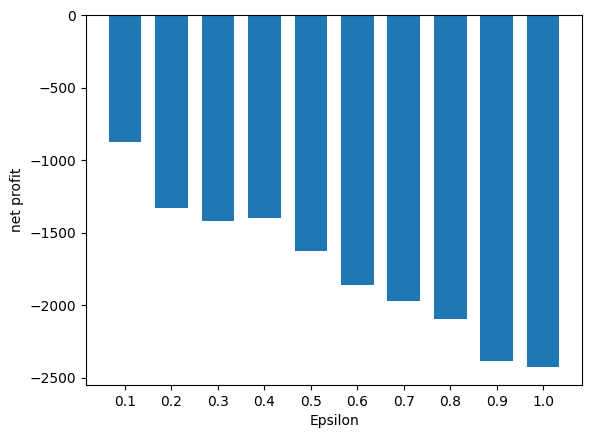

In [13]:
# 연습문제 5 [프로그램 9-1(b)]를 ε을 0.0,0.1,0.2,0.3,⋯,0.9,1.0으로 변화시키면서 순 수익을 계산해 그래프를 그리는 버전으로 확장하시오.
# # 1(b). 다중 손잡이 밴딧 문제를 위한 e(epsilon)-탐욕 알고리즘
import numpy as np 
arms_profit=[0.4,0.12,0.52,0.6,0.25]
n_arms=len(arms_profit)

n_trial=10000

def pull_bandit(handle):
    return 1 if np.random.random()<arms_profit[handle] else -1

def epsilon_greedy(eps):
    episode=[]
    num=np.zeros(n_arms)
    wins=np.zeros(n_arms)
    for i in range(n_trial):
        r=np.random.random()
        if(r<eps or sum(wins)==0):
            h=np.random.randint(0,n_arms)
        else:
            prob=np.asarray([wins[i]/num[i] if num[i]>0 else 0.0 for i in range(n_arms)])
            prob=prob/sum(prob)
            h=np.random.choice(range(n_arms),p=prob)
        reward=pull_bandit(h)
        episode.append([h,reward])
        num[h]+=1
        wins[h]+=1 if reward==1 else 0
    return episode,(num,wins)
        
episodes,rewards = np.array([epsilon_greedy(0.1*e) for e in range(1,11,1)],dtype=object).T
net_profits=[]
for i,(e,r) in enumerate(zip(episodes,rewards)):
    print('epsilon = %0.1f'%((i+1)*0.1),end=' ')
    net_profits.append(sum(np.asarray(e)[:,1]))
    print('순 수익($):',net_profits[i])

import matplotlib.pyplot as plt 
epsilon=np.arange(0.1,1.1,0.1)
plt.bar(epsilon,net_profits,width=0.07)
plt.xticks(epsilon)
plt.xlabel('Epsilon')
plt.ylabel('net profit')
plt.show()
    

In [14]:
# 연습문제 6 [프로그램 9-4]는 바깥으로 나가는 행동에 대해서도 확률을 부여한다. 
# 바깥으로 나가는 행동의 확률이 0이 되도록 프로그램을 개선하시오.
# 4.Q 러닝 알고리즘을 이용한 FrozenLake 문제해결(ε-탐욕 적용)
import gym 
import numpy as np 
import time
from IPython.display import clear_output

env=gym.make('FrozenLake-v1',is_slippery=False,render_mode='ansi')
Q=np.zeros([env.observation_space.n,env.action_space.n])

rho=0.9
lamda=0.99
eps=1.0
eps_decay=0.999

n_episode=3000
length_episode=100

for i in range(n_episode):
    s=env.reset()[0]
    for j in range(length_episode):
        r=np.random.random()
        eps=max(0.01,eps*eps_decay)
        if(r<eps):a=np.random.randint(0,env.action_space.n)
        else: a=np.random.choice(np.argwhere(Q[s,:]==np.amax(Q[s,:])).flatten().tolist())
        s1,r,done,_,_=env.step(a)
        if(s==s1): continue # 만약 이동전과 후의 state가 같다면 Q 값에 적용하지 않고 넘어간다 
        Q[s,a]=Q[s,a]+rho*(r+lamda*np.max(Q[s1,:])-Q[s,a])
        s=s1
        if done: break

np.set_printoptions(precision=2)
print(Q)

[[0.   0.95 0.93 0.  ]
 [0.94 0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.96 0.   0.94]
 [0.   0.   0.   0.  ]
 [0.   0.98 0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.97 0.95]
 [0.96 0.98 0.98 0.  ]
 [0.97 0.99 0.   0.97]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.99 0.97]
 [0.98 0.   1.   0.98]
 [0.   0.   0.   0.  ]]


In [22]:
import gym 
import time
from IPython.display import clear_output 
import numpy as np 
import keyboard
env = gym.make('MountainCar-v0',render_mode='human')
env.reset()
log=[]

def choose_action():
    if keyboard.is_pressed('left'): return 0
    elif keyboard.is_pressed('right'): return 2
    else: return 1

step=0

done = False
while not done: 
    update_state,reward,terminated,truncated,info = env.step(choose_action())
    done = terminated or truncated 
    log.append([update_state,reward,terminated,truncated,info,env._elapsed_steps])
    if len(log)>10: log.pop(0)
    clear_output(wait=True)
    for l in log: print(l)
    env.render()
env.close()


[array([0.09, 0.05], dtype=float32), -1.0, False, False, {}, 164]
[array([0.14, 0.05], dtype=float32), -1.0, False, False, {}, 165]
[array([0.19, 0.05], dtype=float32), -1.0, False, False, {}, 166]
[array([0.24, 0.05], dtype=float32), -1.0, False, False, {}, 167]
[array([0.29, 0.05], dtype=float32), -1.0, False, False, {}, 168]
[array([0.34, 0.05], dtype=float32), -1.0, False, False, {}, 169]
[array([0.39, 0.05], dtype=float32), -1.0, False, False, {}, 170]
[array([0.44, 0.05], dtype=float32), -1.0, False, False, {}, 171]
[array([0.49, 0.05], dtype=float32), -1.0, False, False, {}, 172]
[array([0.53, 0.05], dtype=float32), -1.0, True, False, {}, 173]


MountainCar-v0 Observation


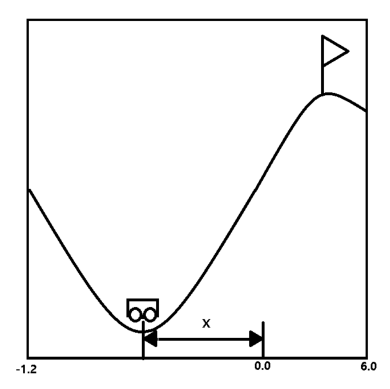

MountainCar-v0 Neural Network


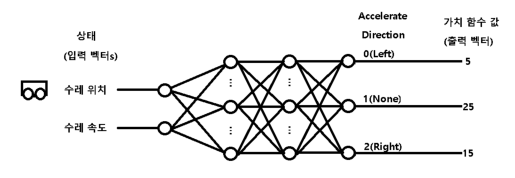

In [23]:
# 연습문제 7-(a) gym이 제공하는 MountainCar v0를 조사하고 [그림 9-12]와 같이 상태 표현을 제시하고 [그림 9-10(a)]와 같이 신경망을 설계하시오.
# [프로그램 9-5]와 [프로그램 9-6]같은 프로그램을 작성하고 실험 결과를 제시하시오.
import cv2
import matplotlib.pyplot as plt 
def plt_imshow(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

print('MountainCar-v0 Observation')
plt_imshow(cv2.imread('./../images/MountainCar-v0/MountainCar-v0-Observation.png'))

print('MountainCar-v0 Neural Network')
plt_imshow(cv2.imread('./../images/MountainCar-v0/MountainCar-v0-Neural-network.png'))

  0번째 에피소드 점수: 200 episode time: 2.58s mean: 200.0
  1번째 에피소드 점수: 200 episode time: 25.00s mean: 200.0
  2번째 에피소드 점수: 200 episode time: 25.44s mean: 200.0
  3번째 에피소드 점수: 200 episode time: 25.91s mean: 200.0
  4번째 에피소드 점수: 200 episode time: 27.00s mean: 200.0
  5번째 에피소드 점수: 200 episode time: 27.32s mean: 200.0
  6번째 에피소드 점수: 200 episode time: 27.52s mean: 200.0
  7번째 에피소드 점수: 200 episode time: 28.15s mean: 200.0
  8번째 에피소드 점수: 200 episode time: 28.40s mean: 200.0
  9번째 에피소드 점수: 200 episode time: 28.42s mean: 200.0
 10번째 에피소드 점수: 200 episode time: 28.60s mean: 200.0
 11번째 에피소드 점수: 200 episode time: 29.09s mean: 200.0
 12번째 에피소드 점수: 200 episode time: 29.01s mean: 200.0
 13번째 에피소드 점수: 200 episode time: 28.93s mean: 200.0
 14번째 에피소드 점수: 137 episode time: 20.07s mean: 195.8
 15번째 에피소드 점수: 200 episode time: 29.39s mean: 196.1
 16번째 에피소드 점수: 200 episode time: 29.22s mean: 196.3
 17번째 에피소드 점수: 127 episode time: 18.62s mean: 192.4
 18번째 에피소드 점수: 144 episode time: 21.23s mean: 189.9
 19번째 에피소드 점수

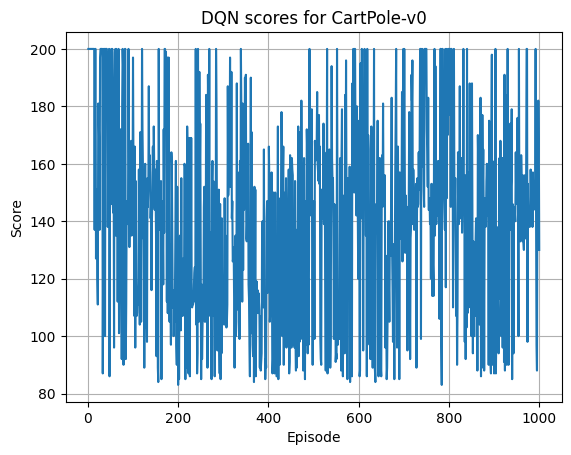

In [2]:
# 연습문제 7-(b) gym이 제공하는 MountainCar v0를 조사하고 [그림 9-12]와 같이 상태 표현을 제시하고 [그림 9-10(a)]와 같이 신경망을 설계하시오.
# [프로그램 9-5]와 [프로그램 9-6]같은 프로그램을 작성하고 실험 결과를 제시하시오.

#5. DQN을 이용한 Mountaincar 문제해결(epsilon-탐욕 적용)
import numpy as np 
import time
import random
import gym 
import tensorflow as tf 
import gc
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam
from collections import deque

def deep_network(input_dim: int,output_dim: int,layer_unit: int=32):
    model=Sequential()
    model.add(Dense(layer_unit,input_dim=input_dim,activation='relu'))
    model.add(Dense(layer_unit,activation='relu'))
    model.add(Dense(output_dim,activation='linear'))
    model.compile(loss='mse',optimizer='Adam')
    return model 

def model_learning(model: Sequential,memory: deque,batch_size: int,rho: float,lamda: float):
        if len(memory) > (batch_size*3):
            mini_batch = np.array(random.sample(memory,batch_size),dtype=object)
            state = np.array([mini_batch[i,0] for i in range(batch_size)])
            update_state = np.array([mini_batch[i,3] for i in range(batch_size)])

            target = model.predict(state,verbose=0)
            update_target = model.predict(update_state,verbose=0)
        
            for i,(s,a,r,us,d) in enumerate(mini_batch): 
                # s: state, a: action, r: reward, us: update_state, d: done
                if d: target[i][a] = r
                else: target[i][a] += rho*((r+lamda*np.amax(update_target[i]))-target[i][a])
            model.fit(state,target,batch_size=batch_size,epochs=1,verbose=0)

def garbage_collector():# tensorflow memory leak 해결(predict) 
        tf.keras.backend.clear_session()
        gc.collect()


rho=0.9
lamda=0.99
eps=0.9
eps_decay=0.999
batch_size=64
n_episode=1000
    
env=gym.make("MountainCar-v0")

n_state = env.observation_space.high.shape[0]
n_action = env.action_space.n

model=deep_network(n_state,n_action)
memory=deque(maxlen=2000)
scores=[]

for episode in range(n_episode):
    s=env.reset()[0]
    episode_time = time.time()
    done = False
    while not done:
        r=np.random.random()
        eps=max(0.01,eps*eps_decay)
        if(r<eps): a=np.random.randint(0,n_action)
        else:
            q=model.predict(np.reshape(s,(1,n_state)),verbose=0)
            a=np.argmax(q[0])
        s1,r,terminated,truncated,_=env.step(a)
        done = terminated or truncated
        r += 1 if terminated else 0
        
        memory.append((s,a,r,s1,done))
        model_learning(model,memory,batch_size,rho,lamda)
        s=s1
        print(f'episode {episode} | step {env._elapsed_steps:3d} | state [{s1[0]:2.03f},{s1[1]:2.03f}]',end ='\r')
        if done: 
            scores.append(env._elapsed_steps)
            log = f'{episode:3d}번째 에피소드 점수: {env._elapsed_steps:3d} episode time: {time.time()-episode_time:.2f}s mean: {np.mean(scores):.1f}'
            print(log)
    garbage_collector()
    
model.save("../temp/MountainCar_DQN.h5")

env.close()
    
plt.plot(range(1,len(scores)+1),scores)
plt.title('DQN scores for CartPole-v0')
plt.ylabel('Score')
plt.xlabel('Episode')
plt.grid()
plt.show()

In [3]:
# 연습문제 7-(b) gym이 제공하는 MountainCar v0를 조사하고 [그림 9-12]와 같이 상태 표현을 제시하고 [그림 9-10(a)]와 같이 신경망을 설계하시오.
# [프로그램 9-5]와 [프로그램 9-6]같은 프로그램을 작성하고 실험 결과를 제시하시오.
 
# 6. 학습된 신경망으로 MountainCar 플레이 
from tensorflow.keras.models import load_model
import numpy as np 
import gym 
import time
import matplotlib.pyplot as plt 
from IPython.display import clear_output
model=load_model("../temp/MountainCar_DQN.h5")

env=gym.make('MountainCar-v0',render_mode='rgb_array')
n_state = env.observation_space.high.shape[0]
n_action = env.action_space.n
s=env.reset()[0]
done = False

while not done:
    q=model.predict(np.reshape(s,[1,n_state]),verbose=0)
    a=np.argmax(q[0])
    s1,r,terminated,truncated,_=env.step(a)
    done = terminated or truncated
    s=s1

    plt.figure(3)
    plt.clf()
    plt.imshow(env.render())
    plt.title(f'{env.spec.id} | Step: {env._elapsed_steps}')
    plt.axis('off')
    plt.show()
    time.sleep(0.02)
    clear_output(wait=True)
print('에피소드의 점수:',env._elapsed_steps)
env.close()

에피소드의 점수: 132
